<a href="https://colab.research.google.com/github/Adityacs23/plotting-graphs/blob/main/BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from statsmodels import api
from scipy import stats as st
from scipy import stats 
from scipy.optimize import minimize
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path="/content/insurance-claim.zip"

In [ ]:
data=pd.read_csv(path)
print(data.head(6))
print(data.shape,"Shape of dataset")

   months_as_customer  age  policy_number  ...  auto_model auto_year fraud_reported
0                   5   37         939011  ...         92x      1997              N
1                 462   58         902576  ...          95      2006              N
2                 198   51         575784  ...      Malibu      1996              N
3                 384   47         102488  ...          95      1990              N
4                 100   27        1129102  ...  Highlander      1998              N
5                 306   50         769636  ...       Civic      1995              N

[6 rows x 39 columns]
(10211, 39) Shape of dataset


In [ ]:
age=np.array(data["age"])
mean_age=np.mean(age)
median_age=np.median(age)
age_std_dev=np.std(age)
age_var=np.var(age)
print ("mean age {} , median age {} , standard deviation {}". format (mean_age,median_age,age_std_dev))

mean age 39.050142003721476 , median age 38.0 , standard deviation 11.508400389771772


In [ ]:
print(data.describe())

       months_as_customer           age  ...  vehicle_claim     auto_year
count        10211.000000  10211.000000  ...   10211.000000  10211.000000
mean           213.467927     39.050142  ...   40822.630497   2004.358927
std            133.639732     11.508964  ...   19666.958809      6.442418
min              0.000000      2.000000  ...      10.000000   1981.000000
25%            106.000000     31.000000  ...   27700.000000   2000.000000
50%            202.000000     38.000000  ...   42200.000000   2005.000000
75%            303.000000     47.000000  ...   54700.000000   2009.000000
max            747.000000     79.000000  ...  110800.000000   2015.000000

[8 rows x 18 columns]


Distribution of age 
data normally distributed arround 39


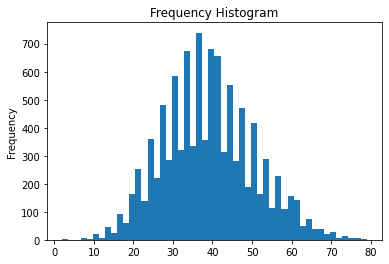

In [ ]:
print("Distribution of age ")
plt.hist(age, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
print("data normally distributed arround 39")

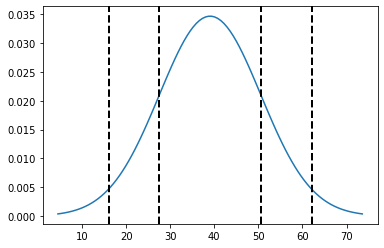

68% people are between 27.0 
 and 50.0 i.e within 1 std_dev 


In [ ]:
mu = mean_age
variance = age_var
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(mean_age-age_std_dev,color='k', linestyle='dashed', linewidth=2)
plt.axvline(mean_age+age_std_dev,color='k', linestyle='dashed', linewidth=2)
plt.axvline(mean_age-2*age_std_dev,color='k', linestyle='dashed', linewidth=2)
plt.axvline(mean_age+2*age_std_dev,color='k', linestyle='dashed', linewidth=2)
plt.show()
print ("68% people are between {} \n and {} i.e within 1 std_dev ". format((mean_age-age_std_dev)//1,(mean_age+age_std_dev)//1))

plotting various distribution


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

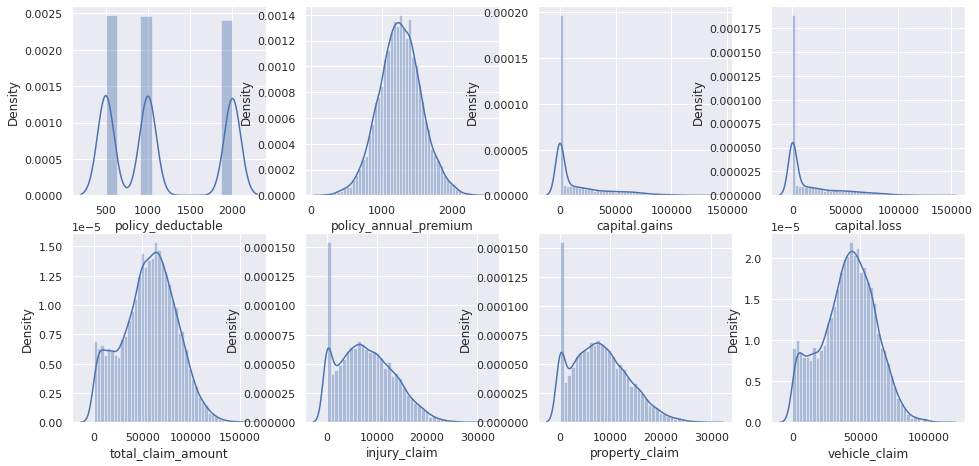

In [ ]:
print("plotting various distribution")

col=['policy_deductable','policy_annual_premium','capital.gains', 'capital.loss','total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']

plt.figure(figsize=(16,16))
F=1
for i in col:
    plt.subplot(4,4,F)
    sns.distplot(data[i])
    F=F+1
plt.show()

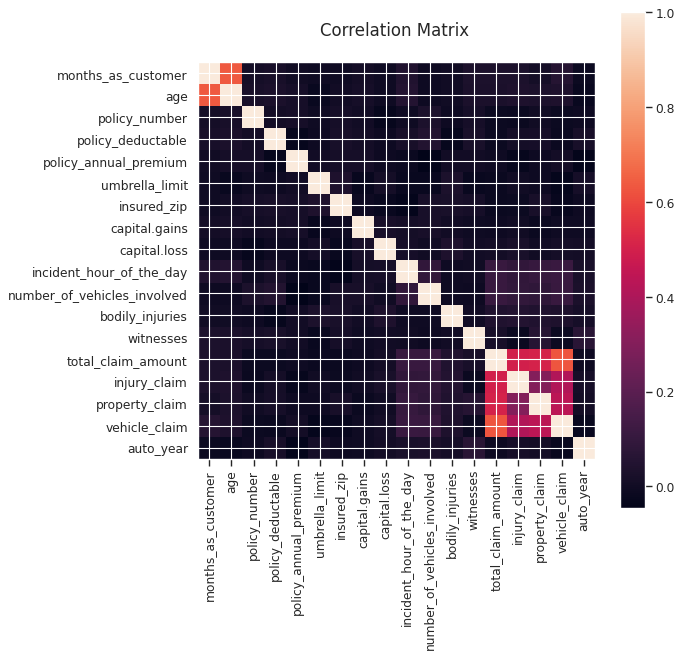

In [ ]:

def plotCorrelationMatrix(df, graphWidth):

    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]]

    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()
plotCorrelationMatrix(data, 8)